# Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

import os
import pandas as pd
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [2]:
# Détection automatique du périphérique (GPU si disponible, sinon CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on device: {device}")

Training on device: cuda


# Data Preparation

In [3]:
class ImageDataset(Dataset):
    def __init__(self, img_dir, labels_file=None, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_names = sorted(os.listdir(img_dir))
        
        if labels_file:
            self.labels = pd.read_csv(labels_file, header=None, names=['label'])
        else:
            self.labels = None

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.img_names[idx])
        image = Image.open(img_name).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        if self.labels is not None:
            label = self.labels.iloc[idx, 0]
            return image, label
        else:
            return image

        
def get_data_loaders(train_img_dir, train_labels_file, val_img_dir, batch_size=256):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    train_dataset = ImageDataset(train_img_dir, train_labels_file, transform=transform)
    val_dataset = ImageDataset(val_img_dir, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


    return train_loader, val_loader

# Training and inference

In [4]:
def train_model(train_loader, num_epochs=10, learning_rate=0.001):
    
    # Load the pretrained ResNet18 model
    model = models.resnet18(pretrained=True)

    # Replace the final classification layer with a binary output layer
    model.fc = nn.Linear(model.fc.in_features, 1)
    model = model.to(device)

    # Binary classification loss function 
    criterion = nn.BCEWithLogitsLoss()

    # Adam optimizer for weight updates
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # The training mode
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        total_batches = len(train_loader)
        print(f"\nEpoch {epoch+1}/{num_epochs}")

        # Iterate over mini-batches
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            # Move data to the selected device
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

            # Reset gradients
            optimizer.zero_grad()

            outputs = model(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

            # Display progress every 10 batches
            if (batch_idx + 1) % 10 == 0 or (batch_idx + 1) == total_batches:
                print(f"  Batch {batch_idx+1}/{total_batches} - Loss: {loss.item():.4f}")

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1} completed. Average Loss: {epoch_loss:.4f}")

    # Save the trained model
    torch.save(model.state_dict(), './mymodel.pth')
    print(" Model saved to './mymodel.pth'")

# Main training function



In [8]:

if __name__ == '__main__':
    train_img_dir = './ml_exercise_therapanacea/train_img/'
    train_labels_file = './ml_exercise_therapanacea/label_train.txt'
    val_img_dir = './ml_exercise_therapanacea/val_img/'

    train_loader, val_loader = get_data_loaders(train_img_dir, train_labels_file, val_img_dir)

    train_model(train_loader)


/home/missa1/venvs/torch-gpu-py311/lib64/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/missa1/venvs/torch-gpu-py311/lib64/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/missa1/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100.0%



Epoch 1/10
  Batch 10/391 - Loss: 0.2385
  Batch 20/391 - Loss: 0.2218
  Batch 30/391 - Loss: 0.2027
  Batch 40/391 - Loss: 0.1749
  Batch 50/391 - Loss: 0.1716
  Batch 60/391 - Loss: 0.1740
  Batch 70/391 - Loss: 0.1644
  Batch 80/391 - Loss: 0.1654
  Batch 90/391 - Loss: 0.1519
  Batch 100/391 - Loss: 0.1374
  Batch 110/391 - Loss: 0.1704
  Batch 120/391 - Loss: 0.1251
  Batch 130/391 - Loss: 0.1722
  Batch 140/391 - Loss: 0.1904
  Batch 150/391 - Loss: 0.1468
  Batch 160/391 - Loss: 0.1289
  Batch 170/391 - Loss: 0.1561
  Batch 180/391 - Loss: 0.1287
  Batch 190/391 - Loss: 0.1186
  Batch 200/391 - Loss: 0.1452
  Batch 210/391 - Loss: 0.1292
  Batch 220/391 - Loss: 0.1075
  Batch 230/391 - Loss: 0.1669
  Batch 240/391 - Loss: 0.1938
  Batch 250/391 - Loss: 0.1732
  Batch 260/391 - Loss: 0.1460
  Batch 270/391 - Loss: 0.0988
  Batch 280/391 - Loss: 0.1466
  Batch 290/391 - Loss: 0.1836
  Batch 300/391 - Loss: 0.1391
  Batch 310/391 - Loss: 0.1217
  Batch 320/391 - Loss: 0.1844
  Bat

/tmp/ipykernel_8992/454487649.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./mymodel.pth'))


Generating predictions...
  Processed batch 10/79
  Processed batch 20/79
  Processed batch 30/79
  Processed batch 40/79
  Processed batch 50/79
  Processed batch 60/79
  Processed batch 70/79
  Processed batch 79/79
 Predictions saved to './label_val.txt'


/tmp/ipykernel_8992/454487649.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f.write(f"{int(pred > 0.5)}\n")


In [12]:
# Load the same model architecture and weights
model = models.resnet18()
model.fc = nn.Linear(model.fc.in_features, 1)
model.load_state_dict(torch.load('./mymodel.pth', map_location=device))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

predictions = []
print("Generating predictions...")

with torch.no_grad():
        for batch_idx, inputs in enumerate(val_loader):
            inputs = inputs.to(device)
            outputs = model(inputs)

            preds = torch.sigmoid(outputs).cpu().numpy()
            predictions.extend(preds)

            if (batch_idx + 1) % 10 == 0 or (batch_idx + 1) == len(val_loader):
                print(f"  Processed batch {batch_idx+1}/{len(val_loader)}")

# Write binary predictions to a text file
with open('./label_val.txt', 'w') as f:
        for pred in predictions:
            f.write(f"{int(pred > 0.5)}\n")

print(" Predictions saved to './label_val.txt'")

Generating predictions...
  Processed batch 10/79
  Processed batch 20/79
  Processed batch 30/79
  Processed batch 40/79
  Processed batch 50/79
  Processed batch 60/79
  Processed batch 70/79
  Processed batch 79/79
 Predictions saved to './label_val.txt'


/tmp/ipykernel_35/3108434105.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f.write(f"{int(pred > 0.5)}\n")


In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def optimize_threshold(predictions, true_labels):
    fpr, tpr, thresholds = roc_curve(true_labels, predictions)
    far = fpr
    frr = 1 - tpr
    hter = (far + frr) / 2

    optimal_idx = hter.argmin()
    optimal_threshold = thresholds[optimal_idx]

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, hter, label='HTER')
    plt.axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('HTER')
    plt.title('HTER vs Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()

    return optimal_threshold


In [16]:
import numpy as np

true_labels = np.loadtxt('./label_val.txt')


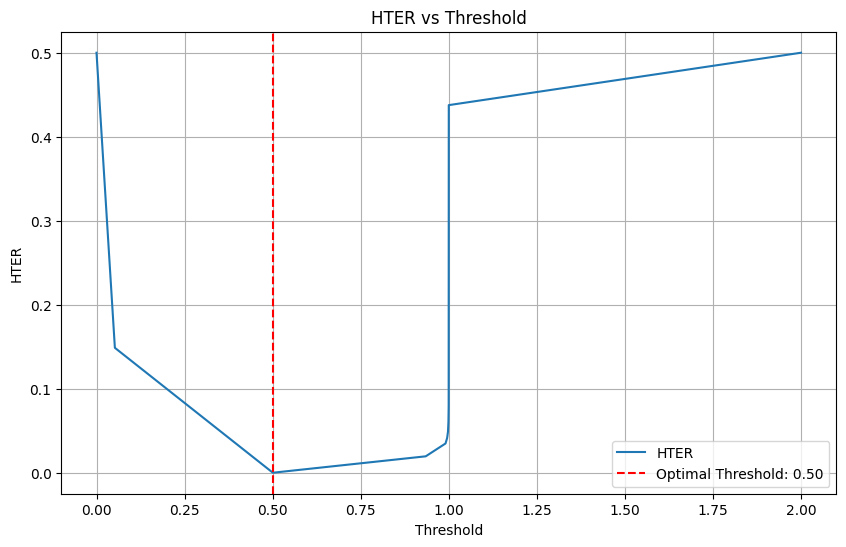

In [17]:
optimal_threshold = optimize_threshold(predictions, true_labels)

In [20]:
# Apply threshold
binary_predictions = [int(p > optimal_threshold) for p in predictions]

/tmp/ipykernel_35/3508367016.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  binary_predictions = [int(p > optimal_threshold) for p in predictions]


In [23]:
with open('./label_val.txt', 'w') as f:
    for pred in binary_predictions:
        f.write(f"{pred}\n")
print(f" Predictions saved using optimal threshold: {optimal_threshold:.4f}")

In [24]:
print(f" Predictions saved using optimal threshold: {optimal_threshold:.4f}")

 Predictions saved using optimal threshold: 0.5005
